#I am using a multiple linear regression machine learning model
#importing graphics and functions for my model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
#some cleaning and calculations were done outside of python out of preference  
executive = pd.read_csv("Desktop\KF\executive.csv")
companynongrowth = pd.read_csv("Desktop\KF\company.csv")

#i calculated and cleaned growth data and saved it in a csv 
company = pd.read_csv("Desktop\KF\company growth data.csv")

In [4]:
executivedf = pd.DataFrame(executive)
companydf = pd.DataFrame(company)

In [5]:
#first I want to determine predictors of a successful company
#i tried using rev per employee, revenue, stock price, stock price growth etc with poor results 

#print(companydf)
companynongrowth['Revenue per Employee'] = companynongrowth['Revenue (millions USD)'] / companynongrowth['Employee Count']


In [6]:
#year is thrown out since i'm using growth data
#profit margin growth produced the highest r^2 value so I am sticking with it 
#it also logically makes the most sense from a finance perspective. It accounts for the categorical vars etc 

x = companydf[['Company ID','Net Promotor Score', 'Stock Price', 'Revenue (millions USD)', 'Industry', 'Employee Count', '% revenue non-us', 'Succession Plan for CEO?', 'Department Responsible for Employee Engagement', 'Marketing Budget  as % of Revenue', 'Employee Annual Turnover %', 'Executive Annual Turnover %', 'Employee Engagement %', 'Customer Satisfaction', 'Millennial % of Workforce', 'Baby Boomer % of Workforce', 'Generation X % of Workforce']]
y = companydf[['Profit Margin']]

In [7]:
# one hot encoding Industry, succession plan, and dept responsible

#identify string objects 
obj_df = x.select_dtypes(include=['object']).copy()
obj_df.head()

#one hot encoding string objects 
x = pd.get_dummies(x, columns=["Industry", "Succession Plan for CEO?", "Department Responsible for Employee Engagement"])

x.head()

,Company ID,Net Promotor Score,Stock Price,Revenue (millions USD),Employee Count,% revenue non-us,Marketing Budget as % of Revenue,Employee Annual Turnover %,Executive Annual Turnover %,Employee Engagement %,...,Generation X % of Workforce,Industry_Consumer,Industry_Financial Services,Industry_Industrial,Industry_Life Sciences,Industry_Technology,Succession Plan for CEO?_N,Succession Plan for CEO?_Y,Department Responsible for Employee Engagement_HR,Department Responsible for Employee Engagement_Marketing
0,279,0.02,0.07,1.05,0,0.60,-0.28,-0.03,-0.08,0.69,...,0.14,0,0,1,0,0,1,0,1,0
1,613,-0.22,0.00,0.48,0,-0.04,0.08,0.18,-0.23,-0.40,...,-0.14,0,0,1,0,0,0,1,1,0
2,642,-0.01,0.02,0.68,0,2.10,-0.24,0.06,0.54,-0.10,...,-0.25,0,1,0,0,0,1,0,1,0
3,875,-0.18,0.05,0.82,0,0.04,0.19,0.54,0.21,-0.14,...,0.51,0,1,0,0,0,1,0,0,1
4,1442,-0.10,0.05,1.40,0,-0.74,-0.04,0.01,-0.28,-0.31,...,-0.16,0,0,0,1,0,1,0,0,1


In [8]:
#checking and cleaning the data again
np.any(np.isnan(x))
np.all(np.isfinite(x))
z = x[np.isnan(x)]
print(z)

      Company ID  Net Promotor Score  Stock Price  Revenue (millions USD)  \
0            NaN                 NaN          NaN                     NaN   
1            NaN                 NaN          NaN                     NaN   
2            NaN                 NaN          NaN                     NaN   
3            NaN                 NaN          NaN                     NaN   
4            NaN                 NaN          NaN                     NaN   
5            NaN                 NaN          NaN                     NaN   
6            NaN                 NaN          NaN                     NaN   
7            NaN                 NaN          NaN                     NaN   
8            NaN                 NaN          NaN                     NaN   
9            NaN                 NaN          NaN                     NaN   
10           NaN                 NaN          NaN                     NaN   
11           NaN                 NaN          NaN                     NaN   

In [9]:
#training and shaping my model. 80/20 is good for moderate datasets 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1810, 23)
(453, 23)
(1810, 1)
(453, 1)


In [10]:
#checking independent vars
y_train.dtypes

Profit Margin    float64
dtype: object

In [11]:
x_train.dtypes


Company ID                                                    int64
Net Promotor Score                                          float64
Stock Price                                                 float64
Revenue (millions USD)                                      float64
Employee Count                                                int64
% revenue non-us                                            float64
Marketing Budget  as % of Revenue                           float64
Employee Annual Turnover %                                  float64
Executive Annual Turnover %                                 float64
Employee Engagement %                                       float64
Customer Satisfaction                                       float64
Millennial % of Workforce                                   float64
Baby Boomer % of Workforce                                  float64
Generation X % of Workforce                                 float64
Industry_Consumer                               

In [12]:
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
# finds the coefficients and the intercept value

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_predicted = mlr.predict(x_test)
# takes values calculated by `.fit()` and the `x` values, plugs them into the multiple linear regression equation, and calculates the predicted y values. 

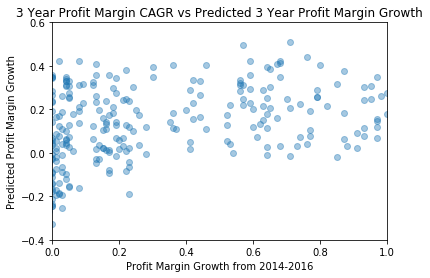

In [14]:
#visualizing data
plt.xlim(0 ,1)
plt.ylim(-.4, .6)
plt.scatter(y_test, y_predicted, alpha=0.4)
plt.xlabel("Profit Margin Growth from 2014-2016")
plt.ylabel("Predicted Profit Margin Growth")
plt.title("3 Year Profit Margin CAGR vs Predicted 3 Year Profit Margin Growth")
#plt.plot(range(100), range(100))

plt.show()

In [15]:
# which independent variables are the strongest predictors of success as measured by rev per employee:
indicators = pd.DataFrame(list(x), list(mlr.coef_))
print(indicators) #marketing as the dept responsible for emplyee engagement actually decreases rev per employee and HR increases 
#marketing budget as % of revenue increases rev per employee
#not having a sucession plan decreases and having one increases rev per emplyee, sign of prep
#consumer is the strongest performer 

#overall this proves that there is no linear relationship between the variables 
#i tried this with a number of dependent variables and underived data in its original time series form

                                                               0
 1.850277e-05                                         Company ID
-4.911442e-02                                 Net Promotor Score
-3.103493e+00                                        Stock Price
 1.644226e-01                             Revenue (millions USD)
-1.110223e-15                                     Employee Count
 1.919753e-02                                   % revenue non-us
 4.392349e-02                  Marketing Budget  as % of Revenue
 6.458193e-02                         Employee Annual Turnover %
 1.446993e-02                        Executive Annual Turnover %
 1.812372e-02                              Employee Engagement %
 6.463818e-02                              Customer Satisfaction
 9.013738e-03                          Millennial % of Workforce
-3.446941e-02                         Baby Boomer % of Workforce
 1.580430e-02                        Generation X % of Workforce
-8.147091e-03            

In [16]:
# a lot of these are left over from old (failed) linear regression/mlr tests
#plt.scatter(x[['Succession Plan for CEO?_N']], y[['Stock Price']], alpha=0.4)

In [17]:
#plt.ylim(0 ,10)
#plt.scatter(x[['Marketing Budget  as % of Revenue']], y[['Stock Price']], alpha=0.4)

In [18]:
#plt.scatter(x[['Employee Annual Turnover %']], y[['Stock Price']], alpha=0.4)

In [19]:
#plt.scatter(x[['Executive Annual Turnover %']], y[['Stock Price']], alpha=0.4)

In [20]:
#plt.scatter(x[['Employee Engagement %']], y[['Revenue per Employee']], alpha=0.4)

In [21]:
#plt.scatter(x[['Customer Satisfaction']], y[['Revenue per Employee']], alpha=0.4)

In [22]:
#plt.scatter(x[['Net Promotor Score']], y[['Revenue per Employee']], alpha=0.4)

In [23]:
#plt.scatter(x[['Millennial % of Workforce']], y[['Revenue per Employee']], alpha=0.4)

In [24]:
#plt.scatter(x[['Baby Boomer % of Workforce']], y[['Revenue per Employee']], alpha=0.4)

In [25]:
#plt.scatter(x[['Generation X % of Workforce']], y[['Revenue per Employee']], alpha=0.4)

In [26]:
#plt.scatter(x[['Profit Margin']], x[['Revenue (millions USD)']], alpha=0.4)

In [27]:
#plt.scatter(x[['Stock Price']], y[['Revenue per Employee']], alpha=0.4)
#plt.scatter(x[['Stock Price']], y[['Revenue per Employee']], alpha=0.4)

In [28]:
#flattening the lsit
list_of_predictions = np.array(y_predicted).tolist()
all(isinstance(n, float) for n in list_of_predictions)
type(list_of_predictions[1])
list_of_predictions = [item for items in list_of_predictions for item in items]
list_of_predictions[1]

0.00895267560000329

In [29]:
#filter exec file for CMO data
CMOdf = executivedf[executivedf['Title'] == 'CMO']
CMOdf.head()

,Executive ID,Company ID,Start Date at Company,Time at Company,Start Date in Role,Time in Role,Year of Birth,Age,Korn Ferry Placement?,Gender,Working Remotely?,On a board,MBA?,Learning Agility Score %,Title,# of Direct Reports,Compensation,Unnamed: 17,Unnamed: 18,Unnamed: 19
3,4,1,82016,NaN,112016,NaN,1955,NaN,N,F,Y,N,Y,51,CMO,6,281140,NaN,NaN,NaN
9,10,3,42012,NaN,102014,NaN,1954,NaN,Y,M,N,N,Y,63,CMO,8,152039,NaN,NaN,NaN
14,15,4,12010,NaN,82011,NaN,1977,NaN,Y,M,N,Y,Y,59,CMO,12,190158,NaN,NaN,NaN
18,19,5,32009,NaN,122010,NaN,1968,NaN,Y,F,Y,N,N,7,CMO,9,346283,NaN,NaN,NaN
23,24,6,12009,NaN,82013,NaN,1968,NaN,Y,F,Y,N,N,50,CMO,8,242053,NaN,NaN,NaN


In [30]:
company = list(x['Company ID'])
len(company)
# make the dataframes the same size
CMOdf.append([CMOdf]*3,ignore_index=True)
len(company)


2263

In [31]:
len(CMOdf)

1867

In [32]:
CMOdf.head()

,Executive ID,Company ID,Start Date at Company,Time at Company,Start Date in Role,Time in Role,Year of Birth,Age,Korn Ferry Placement?,Gender,Working Remotely?,On a board,MBA?,Learning Agility Score %,Title,# of Direct Reports,Compensation,Unnamed: 17,Unnamed: 18,Unnamed: 19
3,4,1,82016,NaN,112016,NaN,1955,NaN,N,F,Y,N,Y,51,CMO,6,281140,NaN,NaN,NaN
9,10,3,42012,NaN,102014,NaN,1954,NaN,Y,M,N,N,Y,63,CMO,8,152039,NaN,NaN,NaN
14,15,4,12010,NaN,82011,NaN,1977,NaN,Y,M,N,Y,Y,59,CMO,12,190158,NaN,NaN,NaN
18,19,5,32009,NaN,122010,NaN,1968,NaN,Y,F,Y,N,N,7,CMO,9,346283,NaN,NaN,NaN
23,24,6,12009,NaN,82013,NaN,1968,NaN,Y,F,Y,N,N,50,CMO,8,242053,NaN,NaN,NaN


In [33]:
len(y)

2263

In [34]:
len(list(x['Company ID']))

2263

In [35]:
len(list(CMOdf['Company ID']))

1867

In [36]:
count = list(set(x['Company ID']))


In [37]:
len(count)

2263

In [40]:
len(x['Company ID'])

2263

In [41]:
#plt.scatter(x[['Stock Price']], x[['Marketing Budget as % of Revenue']])

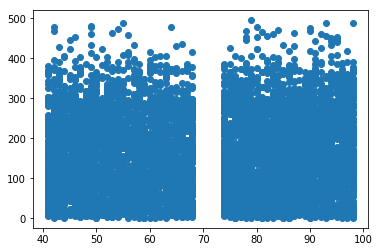

In [42]:
plt.scatter(companynongrowth['Net Promotor Score'], companynongrowth['Stock Price'])

In [43]:
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.24147889918703414
Test score:
0.2174826525697171


In [44]:
## Import the random forest model since there's no linear relationship 
from sklearn.ensemble import RandomForestRegressor
## This line instantiates the model. 
rf = RandomForestRegressor(n_estimators = 2000, random_state = 0)
## Fit the model on your training data.
rf.fit(x_train, np.ravel(y_train))
## And score it on your testing data.
score = rf.score(x_test, y_test)
print(score)

C:\Users\bbloome\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.28413442614528606


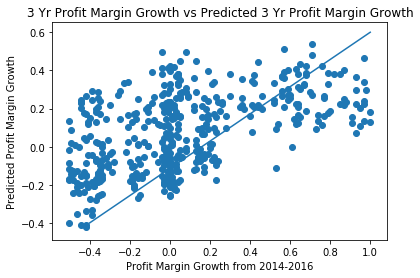

In [49]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,index = x_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False) 
y_pred = rf.predict(x_test)
plt.scatter(x=y_test, y=y_pred)
plt.plot([-.4,1],[-.4,.6])
plt.xlabel("Profit Margin Growth from 2014-2016")
plt.ylabel("Predicted Profit Margin Growth")
plt.title("3 Yr Profit Margin Growth vs Predicted 3 Yr Profit Margin Growth")
plt.savefig('profit margin growth.png')


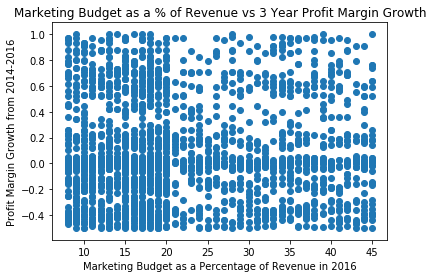

In [60]:
#I want to compare marketing bugest as % of revenue in 2016 to profit margin growth
is_2016 =  companynongrowth['Year']==2016
company2016 = companynongrowth[is_2016]
company2016.head()

plt.scatter(company2016['Marketing Budget  as % of Revenue'], y['Profit Margin'])
plt.ylabel("Profit Margin Growth from 2014-2016")
plt.xlabel("Marketing Budget as a Percentage of Revenue in 2016")
plt.title("Marketing Budget as a % of Revenue vs 3 Year Profit Margin Growth")
plt.savefig('marketing budget.png')

In [61]:
feature_importances

,importance
Stock Price,0.207176
Revenue (millions USD),0.155484
Company ID,0.067837
Employee Annual Turnover %,0.060096
Executive Annual Turnover %,0.058894
% revenue non-us,0.057275
Generation X % of Workforce,0.052670
Customer Satisfaction,0.052146
Net Promotor Score,0.051387
Millennial % of Workforce,0.050364


In [62]:
#now that we've found better preedictors, let's look at the top performers 
companydf = companydf.sort_values('Profit Margin',ascending=False)

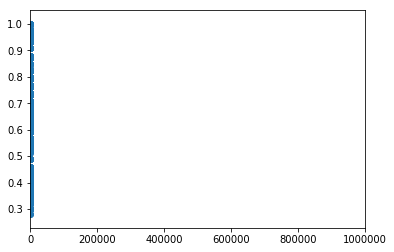

In [87]:
#let's say successful companies are the ones in the 75th percentile by profit margin growth 
#let's look at the top 25% and see what we can find 

len(companydf)
dftop25th = companydf[0:565]
topcompanies = list(dftop25th['Company ID'])

#let's pull as many of them that have CMOs as possible. 566 is a good enough sample size that we won't have
#to go digging for more if some aren't in the dataset 

top25thCMO = CMOdf[CMOdf['Company ID'].isin(topcompanies)]

top25thCMO.head()
len(top25thCMO) #467 CMOs which is a good sample size 

#we now need to refilter the company dataset to get only the company data for the CMOs we have 
newcompanylist = list(top25thCMO['Company ID'])
top25Company = dftop25th[dftop25th['Company ID'].isin(newcompanylist)]
len(top25Company) #467 

plt.xlim(0, 1000000)
plt.scatter(top25thCMO['Compensation'], top25Company['Profit Margin'])

plt.scatter(top25thCMO['Learning Agility Score %'], top25Company['Profit Margin'])
plt.scatter(top25thCMO['Learning Agility Score %'], top25Company['Profit Margin'])


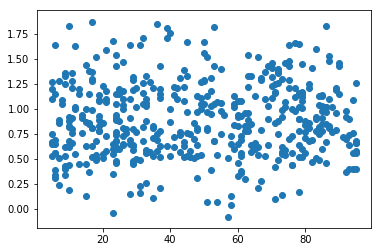

In [64]:
plt.scatter(top25thCMO['Learning Agility Score %'], top25Company['Revenue (millions USD)'])

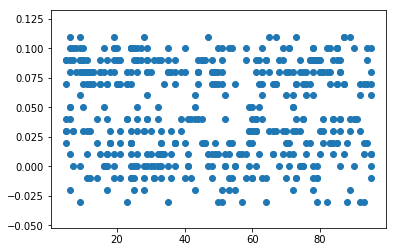

In [65]:
plt.scatter(top25thCMO['Learning Agility Score %'], top25Company['Stock Price'])

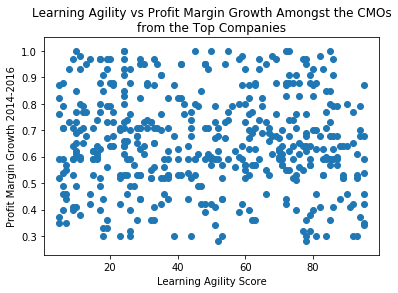

<Figure size 432x288 with 0 Axes>

In [92]:
plt.scatter(top25thCMO['Learning Agility Score %'], top25Company['Profit Margin'])
plt.xlabel("Learning Agility Score")
plt.ylabel("Profit Margin Growth 2014-2016")
from textwrap import wrap
title = 'Learning Agility vs Profit Margin Growth Amongst the CMOs from the Top Companies'
plt.title('\n'.join(wrap(title,60)))

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('test4.png', dpi=100)

plt.savefig('learning agility.png')

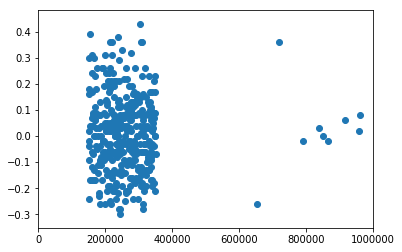

In [67]:
plt.xlim(1, 1000000)
plt.scatter(top25thCMO['Compensation'], top25Company['Marketing Budget  as % of Revenue'])

In [68]:
#plt.scatter(top25Company['Marketing Budget  as % of Revenue', top25Company['Profit Margin'] ])

In [69]:
#let's look at time in role 
companynongrowth['Revenue per Employee'] = companynongrowth['Revenue (millions USD)'] / companynongrowth['Employee Count']


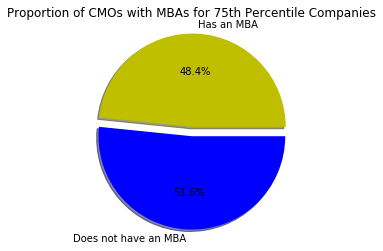

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [70]:
#no linear relationships thus far so let's look at the categorical variables
hasMBA = list(top25thCMO['MBA?']).count('Y')
noMBA = list(top25thCMO['MBA?']).count('N')
KFplaced = list(top25thCMO['Korn Ferry Placement?']).count('Y')
notKFplaced = list(top25thCMO['Korn Ferry Placement?']).count('N')
boardmember = list(top25thCMO['On a board']).count('Y')
notaboardmember = list(top25thCMO['On a board']).count('N')

MBA = 'Has an MBA', 'Does not have an MBA'

counts = [hasMBA, noMBA]  
colors = ['y', 'b']

plt.pie(counts, labels = MBA, colors=colors ,shadow = True, explode = (0.05, 0.05), autopct = '%1.1f%%')  
plt.axis('equal')
plt.title("Proportion of CMOs with MBAs for 75th Percentile Companies")


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('test.png', dpi=100)

plt.show()
plt.savefig('MBA.png')

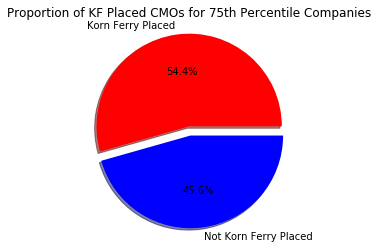

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [71]:
KF = 'Korn Ferry Placed', 'Not Korn Ferry Placed'

counts = [KFplaced, notKFplaced]  
colors = ['r', 'b']

plt.pie(counts, labels = KF, colors=colors ,shadow = True, explode = (0.05, 0.05), autopct = '%1.1f%%')  
plt.axis('equal')
plt.title("Proportion of KF Placed CMOs for 75th Percentile Companies")


fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('test2.png', dpi=100)

plt.show()  
plt.savefig('KF2 Placement.png')

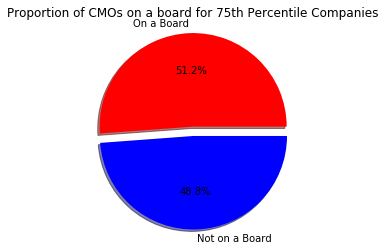

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [72]:
KF = 'On a Board', 'Not on a Board'

counts = [boardmember, notaboardmember]  
colors = ['r', 'b']

plt.pie(counts, labels = KF, colors=colors ,shadow = True, explode = (0.05, 0.05), autopct = '%1.1f%%')  
plt.axis('equal')
plt.title("Proportion of CMOs on a board for 75th Percentile Companies")

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('test3.png', dpi=100)

plt.show()  
plt.savefig('board.png')

In [73]:
dftop10 = companydf[0:10]

In [74]:
top10companies = list(dftop10['Company ID'])

In [75]:
top10companies

[279, 642, 875, 1442, 1512, 1625, 1908, 2180, 613, 1552]

In [76]:
top10CMO = CMOdf[CMOdf['Company ID'].isin(top10companies)]
top10Company = x[x['Company ID'].isin(top10companies)]
#CMOtripled[CMOtripled['Company ID'].isin(companylist)

In [77]:
top10CMO

,Executive ID,Company ID,Start Date at Company,Time at Company,Start Date in Role,Time in Role,Year of Birth,Age,Korn Ferry Placement?,Gender,Working Remotely?,On a board,MBA?,Learning Agility Score %,Title,# of Direct Reports,Compensation,Unnamed: 17,Unnamed: 18,Unnamed: 19
1141,1142,279,12014,NaN,72016,NaN,1981,NaN,N,M,N,Y,N,35,CMO,3,209561,NaN,NaN,NaN
2547,2548,613,82014,NaN,62023,NaN,1971,NaN,N,M,N,N,N,87,CMO,15,6883935,NaN,NaN,NaN
2669,2670,642,62014,NaN,102018,NaN,1981,NaN,N,M,Y,Y,Y,94,CMO,1,6883113,NaN,NaN,NaN
3640,3641,875,102014,NaN,102025,NaN,1976,NaN,N,M,N,N,N,48,CMO,11,163736,NaN,NaN,NaN
5963,5964,1442,82016,NaN,92020,NaN,1954,NaN,N,F,Y,N,Y,43,CMO,10,150297,NaN,NaN,NaN
6249,6250,1512,12014,NaN,112030,NaN,1984,NaN,N,F,N,N,N,70,CMO,16,252189,NaN,NaN,NaN
6423,6424,1552,32015,NaN,32031,NaN,1985,NaN,N,M,Y,Y,N,36,CMO,5,182706,NaN,NaN,NaN
6740,6741,1625,12009,NaN,22020,NaN,1984,NaN,Y,F,Y,N,Y,63,CMO,19,185763,NaN,NaN,NaN
7909,7910,1908,92015,NaN,82022,NaN,1980,NaN,N,F,Y,Y,N,27,CMO,20,224918,NaN,NaN,NaN
9034,9035,2180,12003,NaN,52016,NaN,1981,NaN,Y,M,Y,N,Y,28,CMO,4,237897,NaN,NaN,NaN


In [78]:
dftop10 = companydf[0:11]
top10companies = list(dftop10['Company ID'])
top10CMO = CMOdf[CMOdf['Company ID'].isin(top10companies)]
top10Company = x[x['Company ID'].isin(top10companies)]
top10Company = top10Company.drop(top10Company.index[4])

In [79]:
top10CMO
len(top10CMO)
len(top10Company)

10

In [93]:
#plt.xlim(0,1000000 )
#plt.scatter(top10CMO['Compensation'], top10Company['Stock Price'])

In [94]:
topgrowth = [1,1,1,1,1,1,1,1,1,.98,.98]

In [95]:
top10Company

,Company ID,Net Promotor Score,Stock Price,Revenue (millions USD),Employee Count,% revenue non-us,Marketing Budget as % of Revenue,Employee Annual Turnover %,Executive Annual Turnover %,Employee Engagement %,...,Generation X % of Workforce,Industry_Consumer,Industry_Financial Services,Industry_Industrial,Industry_Life Sciences,Industry_Technology,Succession Plan for CEO?_N,Succession Plan for CEO?_Y,Department Responsible for Employee Engagement_HR,Department Responsible for Employee Engagement_Marketing
0,279,0.02,0.07,1.05,0,0.60,-0.28,-0.03,-0.08,0.69,...,0.14,0,0,1,0,0,1,0,1,0
1,613,-0.22,0.00,0.48,0,-0.04,0.08,0.18,-0.23,-0.40,...,-0.14,0,0,1,0,0,0,1,1,0
2,642,-0.01,0.02,0.68,0,2.10,-0.24,0.06,0.54,-0.10,...,-0.25,0,1,0,0,0,1,0,1,0
3,875,-0.18,0.05,0.82,0,0.04,0.19,0.54,0.21,-0.14,...,0.51,0,1,0,0,0,1,0,0,1
5,1512,0.05,0.00,1.06,0,-0.04,0.00,-0.01,0.35,-0.02,...,-0.19,0,0,0,0,1,0,1,1,0
6,1625,-0.02,0.04,0.97,0,-0.21,0.19,0.00,0.00,0.19,...,-0.26,0,0,0,0,1,0,1,0,1
7,1908,0.11,0.07,0.62,0,-0.38,-0.06,0.03,0.19,0.22,...,-0.15,0,0,0,1,0,1,0,1,0
8,2180,0.07,0.07,0.78,0,-0.13,0.19,0.30,-0.10,0.06,...,-0.05,1,0,0,0,0,0,1,0,1
13,1552,0.32,-0.03,1.41,0,1.23,-0.02,0.06,0.01,-0.14,...,-0.31,0,0,1,0,0,1,0,0,1
14,1627,0.09,0.02,1.13,0,0.22,0.02,0.67,0.51,0.11,...,0.12,0,0,1,0,0,1,0,0,1


In [96]:
top10CMO

,Executive ID,Company ID,Start Date at Company,Time at Company,Start Date in Role,Time in Role,Year of Birth,Age,Korn Ferry Placement?,Gender,Working Remotely?,On a board,MBA?,Learning Agility Score %,Title,# of Direct Reports,Compensation,Unnamed: 17,Unnamed: 18,Unnamed: 19
1141,1142,279,12014,NaN,72016,NaN,1981,NaN,N,M,N,Y,N,35,CMO,3,209561,NaN,NaN,NaN
2547,2548,613,82014,NaN,62023,NaN,1971,NaN,N,M,N,N,N,87,CMO,15,6883935,NaN,NaN,NaN
2669,2670,642,62014,NaN,102018,NaN,1981,NaN,N,M,Y,Y,Y,94,CMO,1,6883113,NaN,NaN,NaN
3640,3641,875,102014,NaN,102025,NaN,1976,NaN,N,M,N,N,N,48,CMO,11,163736,NaN,NaN,NaN
5963,5964,1442,82016,NaN,92020,NaN,1954,NaN,N,F,Y,N,Y,43,CMO,10,150297,NaN,NaN,NaN
6249,6250,1512,12014,NaN,112030,NaN,1984,NaN,N,F,N,N,N,70,CMO,16,252189,NaN,NaN,NaN
6423,6424,1552,32015,NaN,32031,NaN,1985,NaN,N,M,Y,Y,N,36,CMO,5,182706,NaN,NaN,NaN
6740,6741,1625,12009,NaN,22020,NaN,1984,NaN,Y,F,Y,N,Y,63,CMO,19,185763,NaN,NaN,NaN
6748,6749,1627,112001,NaN,72025,NaN,1965,NaN,Y,M,Y,Y,Y,50,CMO,17,246700,NaN,NaN,NaN
7909,7910,1908,92015,NaN,82022,NaN,1980,NaN,N,F,Y,Y,N,27,CMO,20,224918,NaN,NaN,NaN
